# Python para Economistas: Septima Clase

### El problema de predicción:

Usualmente los investigadores y analistas buscan construir herramientas que permitan predecir que es lo que va a ocurrir (por ejemplo si una persona será admitida a algun programa, o si un estudiante desertará de la escuela, entre otros) en base a características (a las cuales llamaremos variables explicativas). Esta predicción permite al usuario o al proveedor planificar y tomar decisiones hoy, anticipandose (con cierto grado de confianza) a lo que pueda ocurrir en el futuro.

<img src="decision_making_flow.png" alt="Drawing" style="width: 600px;">


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn import metrics

# Problema de prediccion binaria:

# Definimos o cargamos base de datos:

candidates = {'Puntaje Examen': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'GPA': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'Experiencia Laboral': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'Admitido': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              } # Fuente "https://datatofish.com/logistic-regression-python/"

df = pd.DataFrame(candidates)

X = df[['Puntaje Examen', 'GPA', 'Experiencia Laboral']]
Y = df[['Admitido']]

clf = LogisticRegression(random_state=0).fit(X, Y) # Definir el problema
#print(clf.coef_)
print(clf.predict(X)) #Predecir el modelo
Y_score = clf.predict_proba(X)
print(Y_score)

[1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0
 0 0 1]
[[0.06125691 0.93874309]
 [0.04972595 0.95027405]
 [0.47598029 0.52401971]
 [0.05410438 0.94589562]
 [0.2103416  0.7896584 ]
 [0.01310386 0.98689614]
 [0.93509143 0.06490857]
 [0.1431864  0.8568136 ]
 [0.03734436 0.96265564]
 [0.95816861 0.04183139]
 [0.90268274 0.09731726]
 [0.08345847 0.91654153]
 [0.02070011 0.97929989]
 [0.29751584 0.70248416]
 [0.12390186 0.87609814]
 [0.98177383 0.01822617]
 [0.87317758 0.12682242]
 [0.07857828 0.92142172]
 [0.99223422 0.00776578]
 [0.95264162 0.04735838]
 [0.9259915  0.0740085 ]
 [0.99325265 0.00674735]
 [0.94959431 0.05040569]
 [0.99636402 0.00363598]
 [0.98056281 0.01943719]
 [0.06801174 0.93198826]
 [0.33107257 0.66892743]
 [0.98564866 0.01435134]
 [0.07857828 0.92142172]
 [0.19945909 0.80054091]
 [0.96405174 0.03594826]
 [0.95213842 0.04786158]
 [0.28187215 0.71812785]
 [0.08431131 0.91568869]
 [0.13532934 0.86467066]
 [0.97334034 0.02665966]
 [0.86152332 0.13

C:\Users\ffalcon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Thresholding:

El score estimado vía el modelo de predicción permite al investigador determinar posibles eventos positivos o negativos. Esto se puede si suponemos que a partir de determinado umbral de probabilidad, el evento es clasificado como positivo. 

In [5]:
Y=np.array(Y).reshape(Y.shape[0])
Y_hat=np.array(Y_score[:,1])

# Convert our Thresholded prob to boolean
threshold = .5
Y = Y.astype(bool)
Y_hat = (Y_hat>threshold).astype(bool)
print(Y_hat)

[ True  True  True  True  True  True False  True  True False False  True
  True  True  True False False  True False False False False False False
 False  True  True False  True  True False False  True  True  True False
 False False False  True]


#### Confusion Matrix:

La matriz de confusion es una matriz que indica todos los posibles escenarios de éxito y fracaso de nuestra predicción. Esta matrix tiene 4 cuadrantes y cada uno tiene un significado.

Verdaderos Positivos: El número de positivos que logramos predecir de manera acertada.

Falsos Positivos: El número de positivos que predijimos de manera erronea (Eran negativos).

Verdaderos Negativos: El número de predicciones negativas que efectivamente eran negativas.

Falsos Positivos: El número de predicciones negativas que en verdad eran positivas.

<img src="confusionMatrxiUpdated.png" alt="Drawing" style="width: 600px;">

In [6]:
def getConfusionMatrix(Y, Y_hat):

    TP = Y[Y_hat == True].sum()
    FP = (~Y[Y_hat == True]).sum()
    FN = Y[Y_hat == False].sum()
    TN = (~Y[Y_hat == False]).sum()

    confusionMatrix = np.array([[TP, FP], [FN, TN]])

    return confusionMatrix

In [7]:
#Get confusion matrix using our function
myConfusionMatrix = getConfusionMatrix(Y, Y_hat)
print(myConfusionMatrix)

[[18  3]
 [ 1 18]]


In [8]:
#Get confusion matrix using scickitlearn function
sklearnConfusionMatrix = confusion_matrix(Y, Y_hat)
print(sklearnConfusionMatrix)

[[18  3]
 [ 1 18]]


In [9]:
#Accuracy: % de resultados que el modelo predijo correctamente.
clf.score(X, Y)

0.9

#### Precision and Recall:

Condicional a un umbral, precision y recall nos indican lo siguiente. 

Precision: ¿Qué proporción de identificaciones positivas fue realmente correcta?

Recall: ¿Qué proporción de positivos reales se identificó correctamente?

In [8]:
#Precision: Cuantos items seleccionados son relevantes
def getPrecision(Y, Y_hat):

    TP = Y[Y_hat == True].sum()
    FP = (~Y[Y_hat == True]).sum()
    precision = TP/(TP+FP)

    return precision

#Recall: Cuantos items relevantes son seleccionados
def getRecall(Y, Y_hat):

    TP = Y[Y_hat == True].sum()
    FN = Y[Y_hat == False].sum()
    recall = TP/(TP+FN)

    return recall


# Usamos las funciones basados en un thresholding de .5:

print('Precision:',getPrecision(Y,Y_hat))
print('Recall:',getRecall(Y,Y_hat))

Precision: 0.8571428571428571
Recall: 0.9473684210526315


Es posible armar Precision-Recall curve, que indica para cada umbral cuales son las combinaciones de precision y recall que corresponden.

C:\Users\ffalcon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


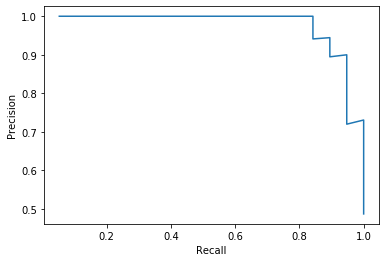

In [16]:
def thresholdingPrecisionRecall(Y, Y_score):

    thresholds = np.unique(Y_score)
    precisionList = []
    recallList = []

    for tt in thresholds:

        Y_hat = Y_score > tt
        precision = getPrecision(Y,Y_hat)
        recall = getRecall(Y,Y_hat)
        precisionList.append(precision)
        recallList.append(recall)

    return precisionList, recallList


precisionList, recallList = thresholdingPrecisionRecall(Y, Y_score[:,1])


# Plot Results:
plt.plot(recallList, precisionList)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve')

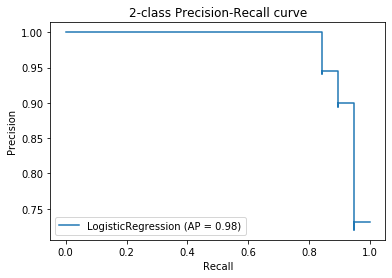

In [21]:
disp = plot_precision_recall_curve(LogisticRegression(random_state=0).fit(X,Y), X, Y)
disp.ax_.set_title('2-class Precision-Recall curve')

#### Receiving Operators Curve and the Area Under the Curve (AUC):

La curva AUC - ROC es una medida de rendimiento para problemas de clasificación condicinal a distintos niveles del umbral de probabilidad. ROC es una curva de probabilidad y AUC representa el grado o medida de separación. Indica cuánto el modelo es capaz de distinguir entre categorías. A mayor AUC, mejor será el modelo para predecir 0s como 0s y 1s como 1s. Cuanto mayor sea el AUC, mejor será el modelo para distinguir entre ocurrencias positivas o negativas.

In [9]:
def getTruePositiveRate(Y, Y_hat):

    TP = Y[Y_hat == True].sum()
    FP = (~Y[Y_hat == True]).sum()
    FN = Y[Y_hat == False].sum()
    TN = (~Y[Y_hat == False]).sum()

    tpr = TP/(TP+FN)

    return tpr


def getFalsePositiveRate(Y, Y_hat):

    TP = Y[Y_hat == True].sum()
    FP = (~Y[Y_hat == True]).sum()
    FN = Y[Y_hat == False].sum()
    TN = (~Y[Y_hat == False]).sum()

    fpr = FP/(FP+TN)

    return fpr

def thresholdingAUC(Y, Y_score):

    thresholds = np.unique(Y_score)
    tprList = []
    fprList = []

    for tt in thresholds:

        Y_hat = Y_score > tt
        tpr = getTruePositiveRate(Y,Y_hat)
        fpr = getFalsePositiveRate(Y,Y_hat)
        tprList.append(tpr)
        fprList.append(fpr)

    return tprList, fprList


tprList, fprList = thresholdingAUC(Y, Y_score[:,1])
AUC = metrics.auc(fprList, tprList)


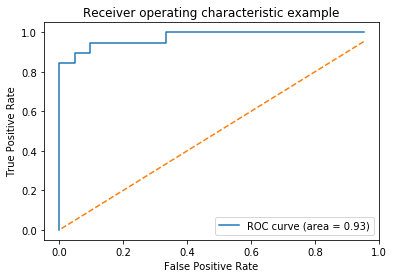

In [11]:
# Plot the figure:
plt.plot(fprList, tprList, label='ROC curve (area = %0.2f)' % AUC)
plt.plot(fprList,fprList, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()